In [1]:
#Question No.1 [Company_Data:- built Decision Tree with target variable Sales]
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
#Read the file
companydata= pd.read_csv('Company_Data.csv') 
companydata 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
companydata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
companydata.describe() 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[Sales1]
#Sales<10 = Lower
#Sales(10 - 15) = Medium
#Sales>15 = Higher
category=pd.cut(companydata.Sales,bins=[0.000000,10,16.270000],labels=['Low','High'])
companydata.insert(0,'Sales1',category) 
companydata 

,Sales1,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
#Drop the column which is not necessary for the futher procedure of DT use only sales criteria for classifying it
companydata=companydata.drop(['Sales'],axis=1)
companydata

,Sales1,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
#Rename the column
companydata=companydata.rename({"Sales1":"Sales"},axis=1)
companydata 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
#Covert the categorical data into numbers 
companydata[['Sales','ShelveLoc','Urban','US']]=companydata[['Sales','ShelveLoc','Urban','US']].apply(lambda x: pd.factorize(x)[0])
companydata[['Sales','ShelveLoc','Urban','US']]

,Sales,ShelveLoc,Urban,US
0,0,0,0,0
1,1,1,0,0
2,1,2,0,0
3,0,2,0,0
4,0,0,0,1
...,...,...,...,...
395,1,1,0,0
396,0,2,1,0
397,0,2,0,0
398,0,0,0,0


In [9]:
x=companydata.iloc[:,1:11]
y=companydata['Sales']

In [10]:
pd.set_option("display.max_rows", None) 
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
5,124,113,13,501,72,0,78,16,1,0
6,115,105,0,45,108,2,71,15,0,1
7,136,81,15,425,120,1,67,10,0,0
8,132,110,0,108,124,2,76,10,1,1
9,132,113,0,131,124,2,76,17,1,0


In [11]:
y 

0      0
1      1
2      1
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     0
11     1
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     0
24     1
25     1
26     0
27     0
28     0
29     0
30     1
31     0
32     0
33     0
34     0
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     1
43     0
44     0
45     0
46     1
47     0
48     0
49     1
50     0
51     0
52     0
53     0
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     1
69     0
70     0
71     0
72     0
73     1
74     0
75     0
76     1
77     0
78     0
79     0
80     0
81     0
82     1
83     0
84     0
85     0
86     0
87     1
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [256]:
#Building Decision Tree classifier using entropy criteria whichever feature reduced the entropy or confusion by max. extent & gives more clarity of information information

In [13]:
#max.depth= pruning of decision tree means cutting down the decision tree to prevent model from overfitting
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

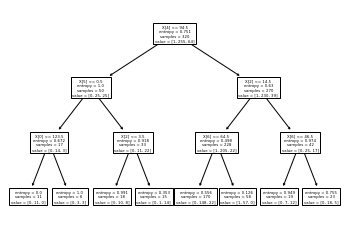

In [14]:
#PLot the decision tree
tree.plot_tree(model); 

In [15]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
fn 

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

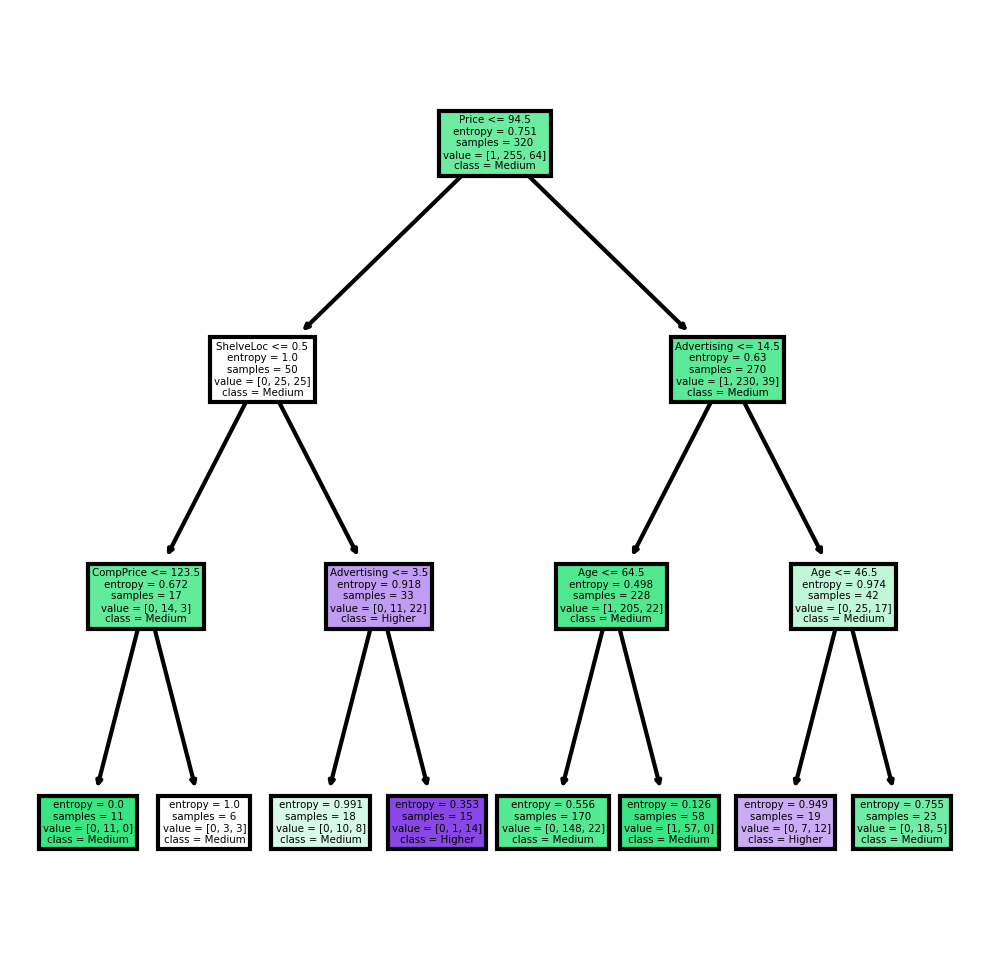

In [16]:
#Above tree plot having notation x1, x2, x3, x4 ie; independent variables notation like x1= CompPrice, x2= Income, x3= Advertising, x4= Population & so on... 
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Lower', 'Medium', 'Higher']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [17]:
#Identify the important feature based on entropy value whichever feature is capable to reduce the confusion by max. extent that features can be called as root node
model.feature_importances_ 

array([0.07324047, 0.        , 0.30918702, 0.        , 0.27399417,
       0.11152959, 0.23204875, 0.        , 0.        , 0.        ])

In [18]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Advertising    0.309187
Price          0.273994
Age            0.232049
ShelveLoc      0.111530
CompPrice      0.073240
Income         0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

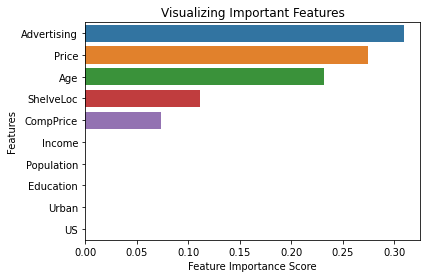

In [19]:
# Creating a bar plot on X-axis= entropy value & Y-axis= independent variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [20]:
#Predicting on test data 
preds = model.predict(x_test)
# getting the count of each category 
pd.Series(preds).value_counts()   

0    70
1    10
dtype: int64

In [21]:
preds 

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds) 

col_0,0,1
Sales,,
0,60,6
1,10,4


In [23]:
# Accuracy 
np.mean(preds==y_test)

0.8

In [268]:
#Building Decision Tree classifier[CART] using Gini Impurity criteria whichever feature reduced the Gini Impurity or residual sum square value by max. extent then this feature called as root node

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [25]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [26]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.8

In [27]:
model_gini.feature_importances_ 

array([0.0566663 , 0.        , 0.3081894 , 0.        , 0.30816872,
       0.22276393, 0.10421165, 0.        , 0.        , 0.        ])

In [28]:
#Decision tree regression [when we apply regression model first we should ensure that our target variable is continuous or not]
from sklearn.tree import DecisionTreeRegressor 

In [29]:
#Read the file
companydata= pd.read_csv('Company_Data.csv') 
companydata 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [30]:
#Covert the categorical data into numbers or object to integers
companydata[['ShelveLoc','Urban','US']]=companydata[['ShelveLoc','Urban','US']].apply(lambda x: pd.factorize(x)[0])
companydata[['ShelveLoc','Urban','US']]

,ShelveLoc,Urban,US
0,0,0,0
1,1,0,0
2,2,0,0
3,2,0,0
4,0,0,1
5,0,1,0
6,2,0,1
7,1,0,0
8,2,1,1
9,2,1,0


In [31]:
#when we apply regression model first we should ensure that our target variable is continuous or not
array = companydata.values
X = array[:,1:11]
y = array[:,0] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [34]:
#Find the accuracy
model.score(X_test,y_test) 

0.2603577690523362